<a href="https://colab.research.google.com/github/JairsonAlbertoSami/scrit_TCC/blob/main/github_classificacao_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apresentação**
Este Jupyter Notebook contém códigos e dados que foram discutidos no artigo. As imagens de satélites Sentinel-2 estão presentes nesta pasta **XXX**

In [21]:
%%capture
!pip install pdpbox
!pip install lime
!pip install shap
!pip install eli5
!pip install mlxtend
!pip install interpret

In [22]:
# Importar bibliotecas (pandas etc)
import numpy as np
import pandas as pd


# Importar algoritmo

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, make_scorer,  accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

from tensorflow.keras.layers import Input, Dense, Dropout, Activation  #importando as camadas a serem utilizadas
from tensorflow.keras.models import Model  #importando o modelo a ser empregado
from keras.models import Sequential, Model  #utilizada para criar o modelo sequencial da MLP
from keras.layers import Dense, Dropout, Input #utilizada para criar as camadas da rede
import seaborn as sns #plotar gráficos

from keras import backend as K

import missingno as msno




# verificar

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from yellowbrick.features import FeatureImportances
from xgboost import XGBClassifier



In [24]:
import datetime
import re
import json
import yaml
import sys
import os
import logging
import logging.config
import time
import multiprocessing
from collections import OrderedDict
import requests
import sqlalchemy
import string
import unicodedata
import yaml
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import tqdm

import numpy as np
from scipy.sparse import issparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    balanced_accuracy_score,
    average_precision_score,
    brier_score_loss,
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    jaccard_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    auc,
)
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectFromModel
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, PCA

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from lightgbm import LGBMClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import joblib
from joblib import delayed, Parallel

#################################
# VARIÁVEIS GLOBAIS
#################################
N_JOBS = -1
BASE_DIR = './'
DEFAULT_RANDOM_STATE = 42

#################################
# CONFIGURAÇÕES
#################################
pd.options.display.max_rows = 500

In [25]:
# montar drive do google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importar os dados em cvs

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Data_TCC/df.csv")
df.head()

,Unnamed: 0,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,...,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi,classe
0,0,2753.058624,1224.078590,1250.437128,1250.870858,2685.184367,31.450258,0.013745,-0.373531,0.364801,...,40.287289,45.659471,114.155740,117.792633,3.089686,0.101680,0.035169,0.047170,0.020073,NaN
1,1,2881.145060,1235.677785,1219.220894,1262.107930,2575.129956,23.797567,0.086262,-0.403594,0.342418,...,53.719208,58.156672,127.975245,148.755286,6.057349,0.106449,0.031324,0.056107,0.030531,NaN
2,2,3632.960000,1533.090000,1553.930000,1755.070000,2849.840000,15.802201,0.256552,-0.400998,0.239051,...,111.859921,117.654261,159.795698,102.221105,2.085619,0.063813,0.026420,0.037520,0.028126,NaN
3,3,1941.631229,1115.531561,1080.966777,905.840532,2838.488372,20.364498,-0.288587,-0.283721,0.514981,...,24.679403,30.700659,57.454600,189.580418,3.030736,0.069984,0.026486,0.039590,0.026612,NaN
4,4,3911.183673,1537.781633,1548.573469,1765.465306,2836.348980,13.668875,0.301277,-0.431290,0.235424,...,156.763019,168.954842,250.731143,195.606161,1.592134,0.124772,0.035664,0.061218,0.041083,NaN


In [27]:
mapeamento = {
    'agrocampes': "Campestre",
    'praia': 'Áreas Descobertas',
    'mangue': 'Mangue',
    'areaUmida': 'Áreas Úmidas',
    'vegetecaoD': 'Vegetação Densa'
}

# Renomear os valores na coluna 'classe' com base no dicionário de mapeamento
df['classe'] = df['classe'].replace(mapeamento)

In [28]:
# O código a seguir filtra um DataFrame chamado 'df' para obter apenas as amostras que possuem valores válidos na coluna 'classe'.
amostras = df[pd.isna(df['classe']) == False]
amostras.head()


,Unnamed: 0,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,...,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi,classe
14347,14347,2898.521994,1278.302053,1256.378299,1323.079179,2457.225806,35.839250,0.138172,-0.394607,0.300048,...,32.712822,37.253440,76.886382,92.860277,1.056437,0.063900,0.021000,0.035115,0.022599,Campestre
14352,14352,2366.021036,1229.844660,1142.381877,1187.245955,1952.152104,33.727548,0.184788,-0.347173,0.241202,...,28.705262,36.303688,63.806451,208.819597,1.032453,0.074507,0.028116,0.042608,0.043028,Campestre
14353,14353,2577.429777,1211.064516,1191.168734,1146.458809,2565.607444,27.574618,-0.018599,-0.365828,0.381984,...,42.237792,48.860838,106.224574,159.585898,3.998982,0.105794,0.034885,0.053514,0.030685,Campestre
14354,14354,2962.717348,1280.287416,1258.538706,1338.024613,2464.033347,33.424913,0.156122,-0.402743,0.296284,...,46.783233,55.346058,107.094573,129.790629,3.859018,0.086178,0.024473,0.046621,0.028409,Campestre
15450,15450,2430.535932,1228.788063,1216.903776,1110.304507,2669.594397,15.578345,-0.110164,-0.330356,0.414786,...,77.108448,99.182004,169.788648,129.735935,7.133296,0.104522,0.037317,0.057726,0.032828,Campestre


In [29]:
# Gera as principais estatísticas descritivas do DataFrame "amostras"
amostras.describe()

,Unnamed: 0,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,...,sd_b11,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,...,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,104968.673984,2183.016794,1356.621339,1343.317059,1313.435625,2254.705976,9.444768,-0.055139,-0.192853,0.281524,...,235.708415,64.496863,82.558729,119.864190,167.611072,2.004285,0.144412,0.050103,0.042962,0.037004
std,44394.003923,997.693043,326.116905,405.514972,594.517394,489.613673,10.378292,0.554722,0.180449,0.194509,...,182.925425,64.025218,78.584286,109.950021,93.703799,1.642371,0.113500,0.037251,0.024511,0.023376
min,14347.000000,461.872595,1009.821483,924.347047,637.316558,797.168796,0.000000,-0.945778,-0.507257,-0.174954,...,23.942181,8.900719,10.916614,12.949153,20.490769,0.000000,0.016515,0.009115,0.003806,0.005609
25%,71322.750000,1139.109372,1111.554774,1033.744635,799.527632,1867.730042,1.971988,-0.451384,-0.338609,0.097318,...,84.833781,19.332174,28.483553,33.924052,113.353018,0.787941,0.069583,0.027303,0.024688,0.021790
50%,107344.000000,1995.446942,1228.582120,1186.552780,1148.432967,2265.471786,4.327313,0.023950,-0.236654,0.301634,...,183.729257,40.706489,50.637869,84.316780,142.656249,1.658691,0.110668,0.038868,0.038080,0.032184
75%,147938.000000,2986.495189,1512.048933,1529.061425,1728.570376,2664.968193,16.431365,0.460227,-0.032230,0.424652,...,335.866998,81.951415,103.490671,167.347657,181.334525,2.745948,0.173117,0.056087,0.054084,0.042857
max,172974.000000,4720.224299,2849.797665,3126.112840,3467.443396,3672.000000,45.393903,0.953237,0.472597,0.648655,...,942.516065,337.063957,396.213764,518.659287,738.837030,10.674643,0.593854,0.227622,0.163812,0.183781


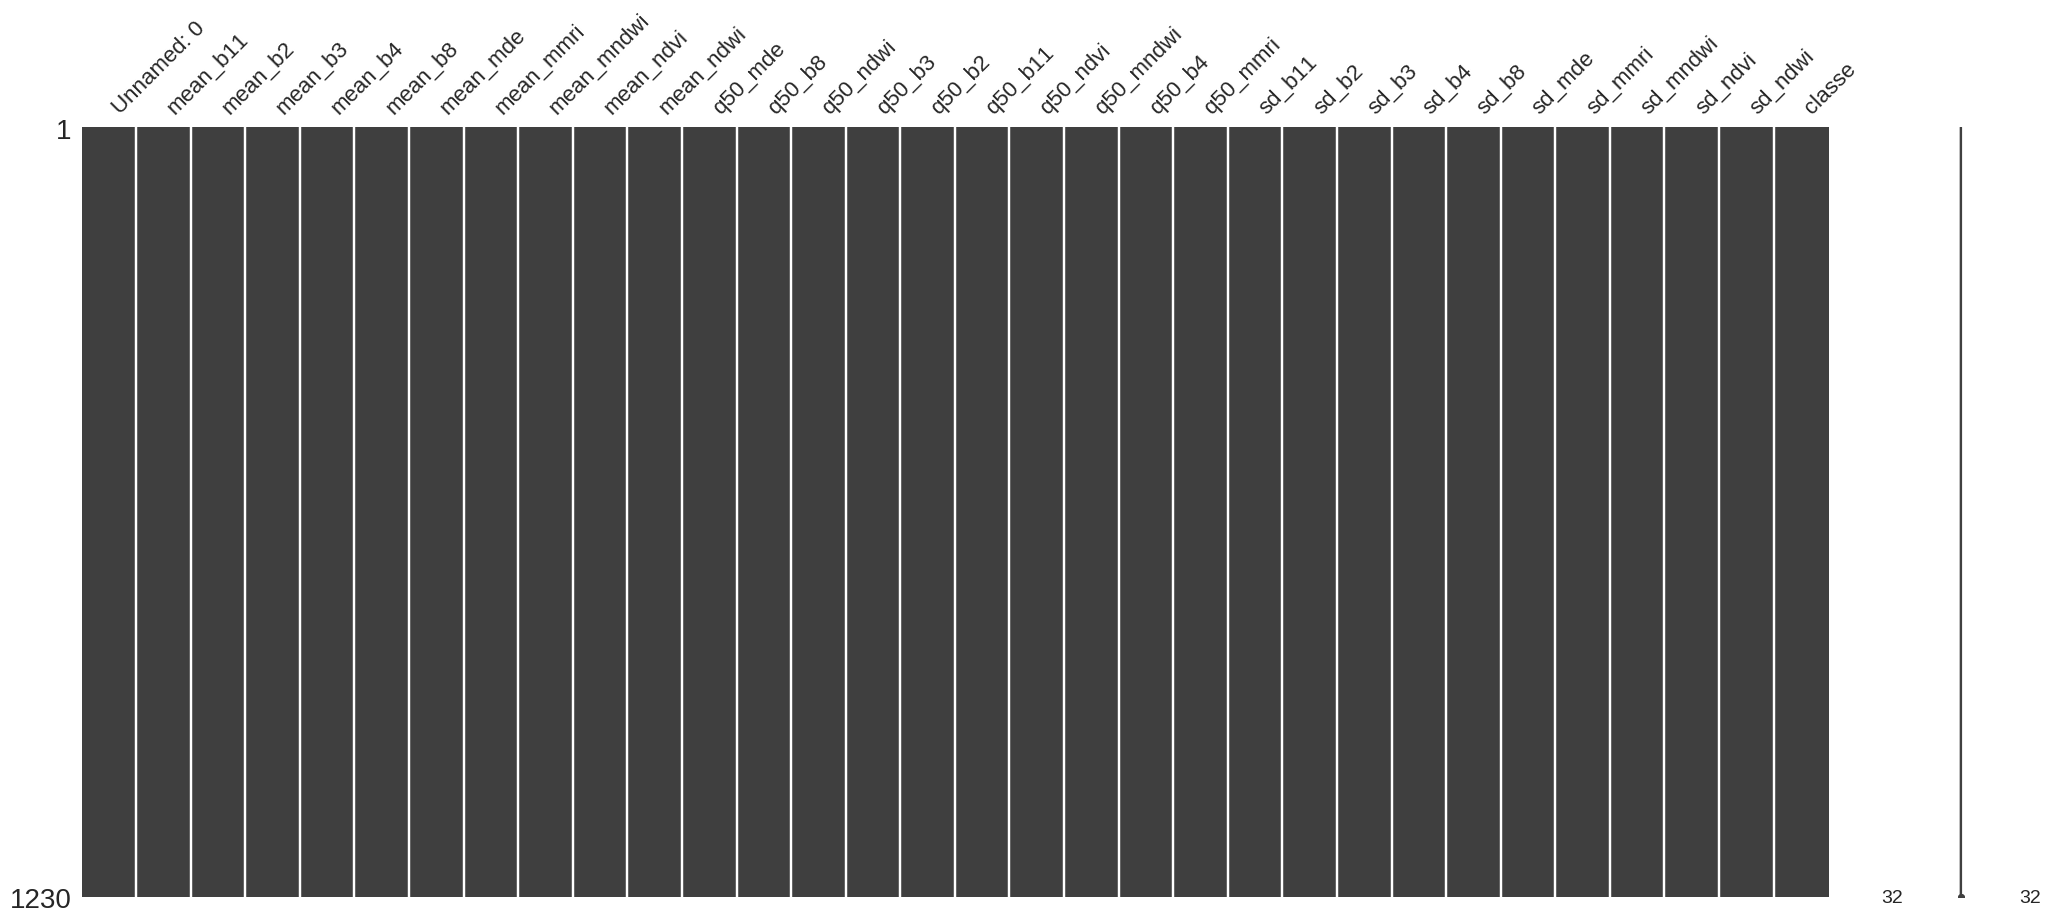

In [30]:
# Matriz de plotagem de dados faltantes (missing data) no DataFrame "amostras".
# É uma ferramenta útil para identificar padrões de ausência de dados e auxiliar em tratamentos adequados.

msno.matrix(amostras)
plt.show()

In [31]:
# A linha a seguir cria uma nova variável 'y', que é uma série contendo a coluna 'classe' do DataFrame 'amostras'.
y = amostras['classe']

# A linha abaixo cria um novo DataFrame 'X', que contém todas as colunas de 'amostras', exceto a coluna 'classe'.
X = amostras.drop(columns=['classe'])


In [32]:
# conferir os dados de x
X.head()

,Unnamed: 0,mean_b11,mean_b2,mean_b3,mean_b4,mean_b8,mean_mde,mean_mmri,mean_mndwi,mean_ndvi,...,sd_b11,sd_b2,sd_b3,sd_b4,sd_b8,sd_mde,sd_mmri,sd_mndwi,sd_ndvi,sd_ndwi
14347,14347,2898.521994,1278.302053,1256.378299,1323.079179,2457.225806,35.839250,0.138172,-0.394607,0.300048,...,154.057546,32.712822,37.253440,76.886382,92.860277,1.056437,0.063900,0.021000,0.035115,0.022599
14352,14352,2366.021036,1229.844660,1142.381877,1187.245955,1952.152104,33.727548,0.184788,-0.347173,0.241202,...,201.612275,28.705262,36.303688,63.806451,208.819597,1.032453,0.074507,0.028116,0.042608,0.043028
14353,14353,2577.429777,1211.064516,1191.168734,1146.458809,2565.607444,27.574618,-0.018599,-0.365828,0.381984,...,239.320264,42.237792,48.860838,106.224574,159.585898,3.998982,0.105794,0.034885,0.053514,0.030685
14354,14354,2962.717348,1280.287416,1258.538706,1338.024613,2464.033347,33.424913,0.156122,-0.402743,0.296284,...,208.778027,46.783233,55.346058,107.094573,129.790629,3.859018,0.086178,0.024473,0.046621,0.028409
15450,15450,2430.535932,1228.788063,1216.903776,1110.304507,2669.594397,15.578345,-0.110164,-0.330356,0.414786,...,298.298276,77.108448,99.182004,169.788648,129.735935,7.133296,0.104522,0.037317,0.057726,0.032828


In [33]:
# conferir os dados de y
y.head()

14347    Campestre
14352    Campestre
14353    Campestre
14354    Campestre
15450    Campestre
Name: classe, dtype: object

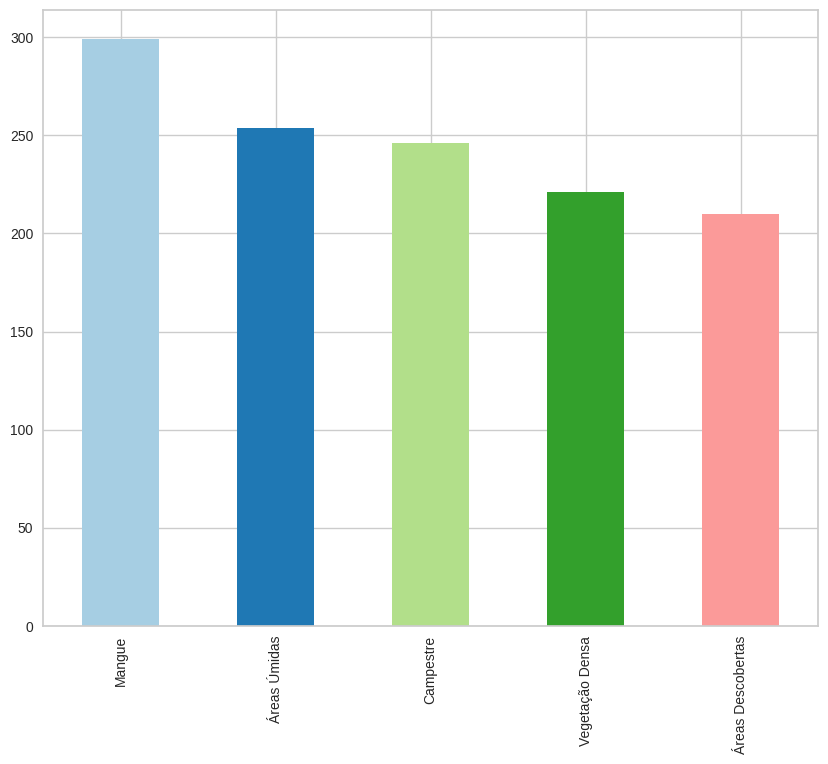

In [34]:
# Gráfico de barras das contagens de classes em 'y'.
# Visualizar a distribuição dos dados e identificar desequilíbrios ou padrões nas classes

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize= (10,8))
# Obtém as contagens de cada classe em 'y' e cria um gráfico de barras com cores diferentes para cada barra.

y.value_counts().plot(ax=ax,
                      kind="bar",
                      color=plt.cm.Paired(range(len(y.value_counts()))))

# Exibe o gráfico.
plt.show()

# **Machine learning**

 Divisão dos dados em conjuntos de treinamento e teste utilizando a função

In [35]:
# Divisão dos dados em conjuntos de treinamento e teste utilizando a função train_test_split.
# O conjunto de teste terá 30% dos dados, com semente aleatória 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Importação das classes enable_halving_search_cv e HalvingGridSearchCV do módulo sklearn.experimental.
# Estas classes permitem utilizar a técnica de busca em grade (Grid Search) com redução de amostras (Halving).

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# **RANDOM FOREST**

É um algoritmo de aprendizado de máquina que combina várias árvores de decisão usando amostragem por bootstrap e seleção aleatória de recursos. É eficaz em classificação e regressão

In [37]:
# Dicionário 'p' com diferentes combinações de hiperparâmetros para a busca em grade.
p = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_samples': [0.8, 1],
}

# Instância do modelo Random Forest com estado aleatório 42.
rf = RandomForestClassifier(random_state=42)

# Aplicação da busca em grade ao modelo com validação cruzada (5 dobras).
cv_rf = GridSearchCV(estimator=rf, param_grid=p, cv=5)

# Treinamento do modelo com o conjunto de treinamento (X_train e y_train).
cv_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 9], 'max_samples': [0.8, 1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 500, 1000]})

In [38]:
# Melhores hiperparâmetros encontrados pela busca em grade (Grid Search) para o modelo Random Forest.
best_params = cv_rf.best_params_
best_params

{'max_depth': 7,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [39]:
# Realiza a previsão do modelo treinado com os melhores hiperparâmetros no conjunto de teste (X_test).
y_pred = cv_rf.predict(X_test)

# Calcula a pontuação F1 usando as previsões e os rótulos verdadeiros do conjunto de teste (y_test),
# considerando a média micro para calcular a pontuação F1.
f1_score_micro_random = f1_score(y_test, y_pred, average='micro')


# A pontuação F1 micro é uma métrica de desempenho em tarefas de classificação.
print(f'Pontuação F1 do modelo Random Forest: {f1_score_micro_random:.2f}')


Pontuação F1 do modelo Random Forest: 0.97


# **MLP**
Multilayer Perceptron (MLP) é um tipo de rede neural artificial com várias camadas ocultas que utiliza algoritmos de retropropagação para ajustar os pesos e realizar aprendizado supervisionado. É amplamente usado em classificação, regressão e reconhecimento de padrões em dados complexos

In [40]:
# Dicionário 'p' com diferentes hiperparâmetros para busca em grade.
p = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [1],
    'max_iter': [1000],
}

# Instância do classificador MLP com três camadas ocultas de 100 neurônios cada.
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100,))

# Aplicação da busca em grade ao modelo MLP com validação cruzada (5 dobras).
cv_mlp = GridSearchCV(estimator=mlp, param_grid=p, cv=5)

# Treinamento do modelo MLP com o conjunto de treinamento (X_train e y_train).
cv_mlp.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=(100, 100, 100)),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [1], 'max_iter': [1000],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [41]:
# Melhores hiperparâmetros encontrados pela busca em grade (Grid Search) para o modelo Multilayer Perceptron (MLP).
best_params_ = cv_mlp.best_params_
best_params_

{'activation': 'tanh', 'alpha': 1, 'max_iter': 1000, 'solver': 'adam'}

In [42]:
# Realiza a previsão do modelo MLP treinado com os melhores hiperparâmetros no conjunto de teste (X_test).
y_pred = cv_mlp.predict(X_test,)

# Calcula a pontuação F1 usando as previsões feitas pelo modelo (y_pred) e os rótulos verdadeiros do conjunto de teste (y_test).
# A média micro é utilizada para calcular a pontuação F1, que é uma métrica de desempenho em tarefas de classificação.
f1_score_micro_MLP = f1_score(y_test, y_pred, average='micro')


# A pontuação F1 micro é uma métrica de desempenho em tarefas de classificação.
print(f'Pontuação F1 do modelo MLP: {f1_score_micro_MLP:.2f}')


Pontuação F1 do modelo MLP: 0.26


In [43]:
# Pontuação F1 do modelo MLP: 0.42

# **SVC**

SVC (Support Vector Classification) é um algoritmo de aprendizado de máquina usado para problemas de classificação. Ele encontra um hiperplano ótimo para separar duas classes no espaço de características. É eficaz em problemas lineares e não lineares.

In [ ]:
# Dicionário 'p' com diferentes hiperparâmetros para busca em grade.

p = {
    'gamma': ['auto', 'scale'],
    'C': [0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Instância do classificador SVC (Support Vector Classification).
svc = SVC()

# Aplicação da busca em grade ao modelo SVC com validação cruzada (5 dobras).
cv_svc = GridSearchCV(estimator=svc, param_grid=p, cv=5)

# Treinamento do modelo SVC com o conjunto de treinamento (X_train e y_train).
cv_svc.fit(X_train, y_train)


In [ ]:
# Melhores hiperparâmetros encontrados pela busca em grade (Grid Search) para o modelo Support Vector Classification (SVC).
best_params_ = cv_svc.best_params_
best_params_

In [ ]:
# Realiza a previsão do modelo SVC treinado com os melhores hiperparâmetros no conjunto de teste (X_test).
y_pred = cv_svc.predict(X_test)

# Calcula a pontuação F1 usando as previsões feitas pelo modelo (y_pred) e os rótulos verdadeiros do conjunto de teste (y_test).
# A média micro é utilizada para calcular a pontuação F1, que é uma métrica de desempenho em tarefas de classificação.
f1_score_micro_svc = f1_score(y_test, y_pred, average='micro')

# A pontuação F1 micro é uma métrica de desempenho em tarefas de classificação.
print(f'Pontuação F1 do modelo SVC: {f1_score_micro_svc:.2f}')

**XGBClassifier**

XGBClassifier é um algoritmo de aprendizado de máquina baseado em gradient boosting usado para classificação e regressão. Ele é eficiente, rápido e pode lidar com grandes conjuntos de dados

In [ ]:
# Dicionário 'p' com diferentes hiperparâmetros para busca em grade.

DEFAULT_RANDOM_STATE = 42

p = {
    'learning_rate': [0.01],
    'n_estimators': [100],
    'subsample': [0.8, 0.45],
    'min_child_weight': [1],
    'max_depth': [3, 4, 7],
    'random_state': [DEFAULT_RANDOM_STATE],
    'reg_lambda': [2],
}

# Instância do classificador XGBClassifier.
xgb = XGBClassifier()

# Aplicação da busca em grade ao modelo XGBClassifier com validação cruzada (5 dobras).
cv_xgb = GridSearchCV(estimator=xgb, param_grid=p, cv=5)

# Treinamento do modelo XGBClassifier com o conjunto de treinamento (X_train e y_train).
cv_xgb.fit(X_train, y_train)


In [ ]:
# Melhores hiperparâmetros encontrados pela busca em grade (Grid Search) para o modelo XGBClassifier.

best_params_ = cv_xgb.best_params_
best_params_

In [ ]:
# Realiza a previsão do modelo XGBClassifier treinado com os melhores hiperparâmetros no conjunto de teste (X_test).
y_pred = cv_xgb.predict(X_test)

# Calcula a pontuação F1 usando as previsões feitas pelo modelo (y_pred) e os rótulos verdadeiros do conjunto de teste (y_test).
# A média micro é utilizada para calcular a pontuação F1, que é uma métrica de desempenho em tarefas de classificação.
f1_score_micro_XGB = f1_score(y_test, y_pred, average='micro')


# A pontuação F1 micro é uma métrica de desempenho em tarefas de classificação.
print(f'Pontuação F1 do modelo XGBClassifier: {f1_score_micro_XGB:.2f}')


# Algoritimo com melhor desempenho na classificação

In [ ]:
print(f'Pontuação F1 do modelo Random Forest: {f1_score_micro_random:.2f}')

print(f'Pontuação F1 do modelo MLP: {f1_score_micro_MLP:.2f}')

print(f'Pontuação F1 do modelo SVC: {f1_score_micro_svc:.2f}')

print(f'Pontuação F1 do modelo XGBClassifier: {f1_score_micro_XGB:.2f}')



# Algoritmo Random Forest
selecionado, porque tem maior f1_score

In [ ]:
# Instância do modelo RandomForestClassifier com os hiperparâmetros selecionados.
rf = RandomForestClassifier(random_state=42,
                            max_depth=9,
                            max_samples=0.8,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=1000)



In [ ]:
# Treina o modelo RandomForestClassifier com o conjunto de treinamento (X_train e y_train).
rf.fit(X_train, y_train)


In [ ]:
# Imprime a dimensão do conjunto de dados de entrada (X).
print(X.shape)

# Imprime a dimensão do conjunto de rótulos (y).
print(y.shape)


In [ ]:
# Obtém os nomes das colunas (características) do conjunto de dados de entrada (X).
colnames = X.columns

# Cria um DataFrame 'feature_importances' contendo as importâncias das características,
# obtidas a partir do modelo RandomForestClassifier (rf), indexado pelos nomes das colunas.

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=colnames,
                                   columns=['importance'])


In [ ]:
# Cria uma figura com o tamanho de 12x5 polegadas para o gráfico de barras.
plt.figure(figsize=(12, 5))

# Cria um gráfico de barras utilizando o Seaborn (sns), onde o eixo x são os nomes das colunas (características)
# e o eixo y representa as importâncias das características, obtidas do DataFrame 'feature_importances'.
g = sns.barplot(x=colnames, y=feature_importances['importance'])

# Rotaciona os rótulos do eixo x em 90 graus para melhor legibilidade.
g.tick_params(axis='x', rotation=90)

# Exibe o gráfico de barras.
plt.show()


In [ ]:
# Importa a classe FeatureImportances da biblioteca Yellowbrick, que permite visualizar as importâncias das características.
from yellowbrick.features import FeatureImportances

# Cria uma figura com o tamanho de 15x10 polegadas para a visualização.
plt.figure(figsize=(15, 10))

# Instancia um modelo RandomForestClassifier.
model = RandomForestClassifier()

# Cria um objeto FeatureImportances com o modelo RandomForestClassifier.
viz = FeatureImportances(model)

# Ajusta o objeto FeatureImportances aos dados de entrada (X) e rótulos (y) para calcular as importâncias das características.
viz.fit(X, y)

# Mostra o gráfico de importâncias das características.
viz.show()


In [ ]:
import eli5
eli5.show_weights(rf, feature_names = X_train.columns.tolist())

In [ ]:
# Importando a função show_prediction da biblioteca eli5
from eli5 import show_prediction

# Exibindo a explicação das previsões feitas pelo modelo de Random Forest (rf) para um exemplo específico (X_train.iloc[1])
# feature_names é uma lista que contém os nomes das características (features) presentes no conjunto de treinamento (X_train)
# show_feature_values=True indica que queremos mostrar os valores das características (features) na explicação

show_prediction(rf, X_train.iloc[1], feature_names=X_train.columns.tolist(), show_feature_values=True)


In [ ]:
# Fazendo a previsão das classes ou valores usando o modelo de Random Forest (rf)
y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf, X_test, y_test, ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

In [ ]:
# Extrai as classes alvo (rótulos) do DataFrame 'df' e armazena na variável 'y'.
y = df['classe']

# Remove a coluna 'classe' do DataFrame 'df' e armazena o restante dos dados na variável 'X'.
X = df.drop(columns=['classe'])


In [ ]:
X['mean_mde'][X['mean_mde'] < 0] = 0
X['q50_mde'][X['q50_mde'] < 0] = 0
X['sd_mde'][X['sd_mde'] < 0] = 0

In [ ]:
# Realiza a predição das classes utilizando o modelo Random Forest treinado 'rf' nos dados de entrada 'X'.
class_df = rf.predict(X)


In [ ]:
# Criação de um DataFrame chamado df_pred a partir de um objeto chamado class_df
df_pred = pd.DataFrame(class_df)


In [ ]:
# Importando a biblioteca "files" do Google Colab
from google.colab import files

# Salvando o DataFrame df_pred em um arquivo CSV chamado 'df_final.csv', sem incluir o índice
df_pred.to_csv('df_final.csv', index=False)

# Fazendo o download do arquivo 'df_final.csv' para o seu dispositivo local
files.download('df_final.csv')


# Comparar Algoritimos de machine learning

In [ ]:
# Dados com as pontuações F1-Score para diferentes modelos de Machine Learning
data = {'Random Forest': f1_score_micro_random,
        'XGBClassifier': f1_score_micro_XGB,
        'SVC': f1_score_micro_svc,
        'MLP': f1_score_micro_MLP}

# Lista dos modelos (chaves) e das pontuações F1-Score (valores)
courses = list(data.keys())
values = list(data.values())

# Criando uma figura (gráfico) com tamanho 10x5
fig = plt.figure(figsize=(10, 5))

# Criando um gráfico de barras
plt.bar(courses, values, width=0.4)

# Definindo o rótulo do eixo Y
plt.ylabel("F1-Score")

# Definindo o título do gráfico
plt.title("Avaliação dos modelos de Machine Learning")

# Exibindo o gráfico
plt.show()
